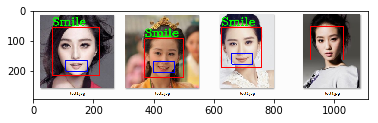

In [2]:
# -*- coding=utf-8 -*-
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

# 人脸检测器
facePath = "datas/lbpcascade_frontalface.xml"
faceCascade = cv2.CascadeClassifier(facePath)

# 笑脸检测器
smilePath = "datas/haarcascade_smile.xml"
smileCascade = cv2.CascadeClassifier(smilePath)

img = cv2.imread("datas/smile-test.jpg")  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 首先检测人脸，返回的是框住人脸的矩形框
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor= 1.1,
    minNeighbors=8,
    minSize=(55, 55),
    flags=cv2.CASCADE_SCALE_IMAGE
)

# 画出每一个人脸，提取出人脸所在区域
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # 对人脸进行笑脸检测
    smile = smileCascade.detectMultiScale(
        roi_gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # 框出上扬的嘴角并对笑脸打上Smile标签
    for (x2, y2, w2, h2) in smile:
        cv2.rectangle(roi_color, (x2, y2), (x2+w2, y2+h2), (255, 0, 0), 2)
        cv2.putText(img,'Smile',(x,y-7), 3, 1.2, (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))